In [18]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup

# Define the function to scrape reviews
def scrape_reviews(url):
    reviews = []

    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        review_elements = soup.find_all("span", class_="review-text-content")

        for review in review_elements:
            reviews.append(review.get_text(strip=True))

    return reviews

# URL of the Amazon product reviews page
url = "https://www.amazon.in/OnePlus-Display-Storage-3700mAH-Battery/product-reviews/B07HGBMJT6"

# Call the function to scrape reviews
all_reviews = scrape_reviews(url)

# Print all the reviews
for index, review in enumerate(all_reviews, start=1):
    print(f"Review {index}: {review}")

Review 1: I have been a loyal OP user for many years now. And i recently upgrade from OnePlus 6 to the 7. My review is from the perspective of a loyal OP user who is now a bit sceptical about the brand & how long will my loyalties withstand. Please do not get me wrong - I did give the phone 5 stars & I shall explain why my last statement is contrary to my rating.First up - OP knocked the pricing out of the park with the OP7. I previously owned a OP6 8/128 gb version & I have been wanting to upgrade to 256gb since I use my phone extensively for taking photos & watching movies on the go.The UFS 3.0 storage helps a lot with that. More over the 3700mah battery (from 6T) helps power through the day with ease. Certainly better than the 3300mah on the OP6.Secondly, the speaker quality feels great. I can finally hear the phone ring in my pocket or in the other room. Something the 6 struggled with. The larger earpiece is also great for calls finally. The rather tiny earpiece on the OP6 made it 

In [19]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from matplotlib.pyplot import imread

In [22]:
all_reviews

['I have been a loyal OP user for many years now. And i recently upgrade from OnePlus 6 to the 7. My review is from the perspective of a loyal OP user who is now a bit sceptical about the brand & how long will my loyalties withstand. Please do not get me wrong - I did give the phone 5 stars & I shall explain why my last statement is contrary to my rating.First up - OP knocked the pricing out of the park with the OP7. I previously owned a OP6 8/128 gb version & I have been wanting to upgrade to 256gb since I use my phone extensively for taking photos & watching movies on the go.The UFS 3.0 storage helps a lot with that. More over the 3700mah battery (from 6T) helps power through the day with ease. Certainly better than the 3300mah on the OP6.Secondly, the speaker quality feels great. I can finally hear the phone ring in my pocket or in the other room. Something the 6 struggled with. The larger earpiece is also great for calls finally. The rather tiny earpiece on the OP6 made it tough to

In [23]:
op_amz=" ".join(all_reviews)
op_amz

"I have been a loyal OP user for many years now. And i recently upgrade from OnePlus 6 to the 7. My review is from the perspective of a loyal OP user who is now a bit sceptical about the brand & how long will my loyalties withstand. Please do not get me wrong - I did give the phone 5 stars & I shall explain why my last statement is contrary to my rating.First up - OP knocked the pricing out of the park with the OP7. I previously owned a OP6 8/128 gb version & I have been wanting to upgrade to 256gb since I use my phone extensively for taking photos & watching movies on the go.The UFS 3.0 storage helps a lot with that. More over the 3700mah battery (from 6T) helps power through the day with ease. Certainly better than the 3300mah on the OP6.Secondly, the speaker quality feels great. I can finally hear the phone ring in my pocket or in the other room. Something the 6 struggled with. The larger earpiece is also great for calls finally. The rather tiny earpiece on the OP6 made it tough to 

In [24]:
op_punc= op_amz.translate(str.maketrans("","",string.punctuation))
op_punc

'I have been a loyal OP user for many years now And i recently upgrade from OnePlus 6 to the 7 My review is from the perspective of a loyal OP user who is now a bit sceptical about the brand  how long will my loyalties withstand Please do not get me wrong  I did give the phone 5 stars  I shall explain why my last statement is contrary to my ratingFirst up  OP knocked the pricing out of the park with the OP7 I previously owned a OP6 8128 gb version  I have been wanting to upgrade to 256gb since I use my phone extensively for taking photos  watching movies on the goThe UFS 30 storage helps a lot with that More over the 3700mah battery from 6T helps power through the day with ease Certainly better than the 3300mah on the OP6Secondly the speaker quality feels great I can finally hear the phone ring in my pocket or in the other room Something the 6 struggled with The larger earpiece is also great for calls finally The rather tiny earpiece on the OP6 made it tough to keep It in position to h

In [25]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
import re
op_url= re.sub(r'http\S+','',op_punc)
op_url

'I have been a loyal OP user for many years now And i recently upgrade from OnePlus 6 to the 7 My review is from the perspective of a loyal OP user who is now a bit sceptical about the brand  how long will my loyalties withstand Please do not get me wrong  I did give the phone 5 stars  I shall explain why my last statement is contrary to my ratingFirst up  OP knocked the pricing out of the park with the OP7 I previously owned a OP6 8128 gb version  I have been wanting to upgrade to 256gb since I use my phone extensively for taking photos  watching movies on the goThe UFS 30 storage helps a lot with that More over the 3700mah battery from 6T helps power through the day with ease Certainly better than the 3300mah on the OP6Secondly the speaker quality feels great I can finally hear the phone ring in my pocket or in the other room Something the 6 struggled with The larger earpiece is also great for calls finally The rather tiny earpiece on the OP6 made it tough to keep It in position to h

In [28]:
op_token= word_tokenize(op_url)
print(op_token)

['I', 'have', 'been', 'a', 'loyal', 'OP', 'user', 'for', 'many', 'years', 'now', 'And', 'i', 'recently', 'upgrade', 'from', 'OnePlus', '6', 'to', 'the', '7', 'My', 'review', 'is', 'from', 'the', 'perspective', 'of', 'a', 'loyal', 'OP', 'user', 'who', 'is', 'now', 'a', 'bit', 'sceptical', 'about', 'the', 'brand', 'how', 'long', 'will', 'my', 'loyalties', 'withstand', 'Please', 'do', 'not', 'get', 'me', 'wrong', 'I', 'did', 'give', 'the', 'phone', '5', 'stars', 'I', 'shall', 'explain', 'why', 'my', 'last', 'statement', 'is', 'contrary', 'to', 'my', 'ratingFirst', 'up', 'OP', 'knocked', 'the', 'pricing', 'out', 'of', 'the', 'park', 'with', 'the', 'OP7', 'I', 'previously', 'owned', 'a', 'OP6', '8128', 'gb', 'version', 'I', 'have', 'been', 'wanting', 'to', 'upgrade', 'to', '256gb', 'since', 'I', 'use', 'my', 'phone', 'extensively', 'for', 'taking', 'photos', 'watching', 'movies', 'on', 'the', 'goThe', 'UFS', '30', 'storage', 'helps', 'a', 'lot', 'with', 'that', 'More', 'over', 'the', '3700m

In [29]:
len(op_token)

8095

In [32]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
token_words= stopwords.words('english')
sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
token_words.extend(sw_list)
op_stopw= [word for word in op_token if not word in token_words]
print(op_stopw)

['loyal', 'OP', 'user', 'many', 'years', 'And', 'recently', 'upgrade', 'OnePlus', '6', '7', 'My', 'review', 'perspective', 'loyal', 'OP', 'user', 'bit', 'sceptical', 'brand', 'long', 'loyalties', 'withstand', 'Please', 'get', 'wrong', 'give', 'phone', '5', 'stars', 'shall', 'explain', 'last', 'statement', 'contrary', 'ratingFirst', 'OP', 'knocked', 'pricing', 'park', 'OP7', 'previously', 'owned', 'OP6', '8128', 'gb', 'version', 'wanting', 'upgrade', '256gb', 'since', 'use', 'phone', 'extensively', 'taking', 'photos', 'watching', 'movies', 'goThe', 'UFS', '30', 'storage', 'helps', 'lot', 'More', '3700mah', 'battery', '6T', 'helps', 'power', 'day', 'ease', 'Certainly', 'better', '3300mah', 'OP6Secondly', 'speaker', 'quality', 'feels', 'great', 'finally', 'hear', 'phone', 'ring', 'pocket', 'room', 'Something', '6', 'struggled', 'The', 'larger', 'earpiece', 'also', 'great', 'calls', 'finally', 'The', 'rather', 'tiny', 'earpiece', 'OP6', 'made', 'tough', 'keep', 'It', 'position', 'hear', 'p

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
op_lower= [Text.lower() for Text in op_stopw]
print(op_lower)

['loyal', 'op', 'user', 'many', 'years', 'and', 'recently', 'upgrade', 'oneplus', '6', '7', 'my', 'review', 'perspective', 'loyal', 'op', 'user', 'bit', 'sceptical', 'brand', 'long', 'loyalties', 'withstand', 'please', 'get', 'wrong', 'give', 'phone', '5', 'stars', 'shall', 'explain', 'last', 'statement', 'contrary', 'ratingfirst', 'op', 'knocked', 'pricing', 'park', 'op7', 'previously', 'owned', 'op6', '8128', 'gb', 'version', 'wanting', 'upgrade', '256gb', 'since', 'use', 'phone', 'extensively', 'taking', 'photos', 'watching', 'movies', 'gothe', 'ufs', '30', 'storage', 'helps', 'lot', 'more', '3700mah', 'battery', '6t', 'helps', 'power', 'day', 'ease', 'certainly', 'better', '3300mah', 'op6secondly', 'speaker', 'quality', 'feels', 'great', 'finally', 'hear', 'phone', 'ring', 'pocket', 'room', 'something', '6', 'struggled', 'the', 'larger', 'earpiece', 'also', 'great', 'calls', 'finally', 'the', 'rather', 'tiny', 'earpiece', 'op6', 'made', 'tough', 'keep', 'it', 'position', 'hear', 'p

In [38]:
import spacy                                      ######lemmitization
from spacy.lang.en.examples import sentences
nlp = spacy.load("en_core_web_sm")
doc= nlp(' '.join(op_lower))
print(doc)

loyal op user many years and recently upgrade oneplus 6 7 my review perspective loyal op user bit sceptical brand long loyalties withstand please get wrong give phone 5 stars shall explain last statement contrary ratingfirst op knocked pricing park op7 previously owned op6 8128 gb version wanting upgrade 256gb since use phone extensively taking photos watching movies gothe ufs 30 storage helps lot more 3700mah battery 6t helps power day ease certainly better 3300mah op6secondly speaker quality feels great finally hear phone ring pocket room something 6 struggled the larger earpiece also great calls finally the rather tiny earpiece op6 made tough keep it position hear person walking often found cranking volume way max op6 however op7 dial 2040 yet loud earsthirdly button placement much better especially alert slider finally ergonomic fit finish great usual come expect oneplus yearsfourthly value money excellent op7 in line first point recall paying 38k 8128gb op6 last year and year 36k 

In [39]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['loyal', 'op', 'user', 'many', 'year', 'and', 'recently', 'upgrade', 'oneplus', '6', '7', 'my', 'review', 'perspective', 'loyal', 'op', 'user', 'bit', 'sceptical', 'brand', 'long', 'loyalty', 'withstand', 'please', 'get', 'wrong', 'give', 'phone', '5', 'star', 'shall', 'explain', 'last', 'statement', 'contrary', 'ratingfirst', 'op', 'knock', 'pricing', 'park', 'op7', 'previously', 'own', 'op6', '8128', 'gb', 'version', 'want', 'upgrade', '256', 'gb', 'since', 'use', 'phone', 'extensively', 'take', 'photo', 'watch', 'movie', 'gothe', 'ufs', '30', 'storage', 'help', 'lot', 'more', '3700mah', 'battery', '6', 't', 'help', 'power', 'day', 'ease', 'certainly', 'well', '3300mah', 'op6secondly', 'speaker', 'quality', 'feel', 'great', 'finally', 'hear', 'phone', 'ring', 'pocket', 'room', 'something', '6', 'struggle', 'the', 'large', 'earpiece', 'also', 'great', 'call', 'finally', 'the', 'rather', 'tiny', 'earpiece', 'op6', 'make', 'tough', 'keep', 'it', 'position', 'hear', 'person', 'walk', 'o

In [41]:
clean_review= " ".join(lemmas)
clean_review

'loyal op user many year and recently upgrade oneplus 6 7 my review perspective loyal op user bit sceptical brand long loyalty withstand please get wrong give phone 5 star shall explain last statement contrary ratingfirst op knock pricing park op7 previously own op6 8128 gb version want upgrade 256 gb since use phone extensively take photo watch movie gothe ufs 30 storage help lot more 3700mah battery 6 t help power day ease certainly well 3300mah op6secondly speaker quality feel great finally hear phone ring pocket room something 6 struggle the large earpiece also great call finally the rather tiny earpiece op6 make tough keep it position hear person walk often find cranking volume way max op6 however op7 dial 2040 yet loud earsthirdly button placement much well especially alert slider finally ergonomic fit finish great usual come expect oneplus yearsfourthly value money excellent op7 in line first point recall pay 38k 8128 gb op6 last year and year 36k get 8256 gb op7lastly op6 trade

In [43]:
cv= CountVectorizer()
review_op= cv.fit_transform(lemmas)

In [47]:
print(review_op.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
ngram_cv=  CountVectorizer(analyzer="word",ngram_range=(1,3), max_features=100)
matrix_ngram= ngram_cv.fit_transform(lemmas)

In [49]:
print(matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_tfidf= TfidfVectorizer(norm='l2',analyzer="word",ngram_range=(1,3),max_features=500)
matrix_tfidf= ngram_tfidf.fit_transform(lemmas)

In [51]:
print(matrix_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **Workcloud**

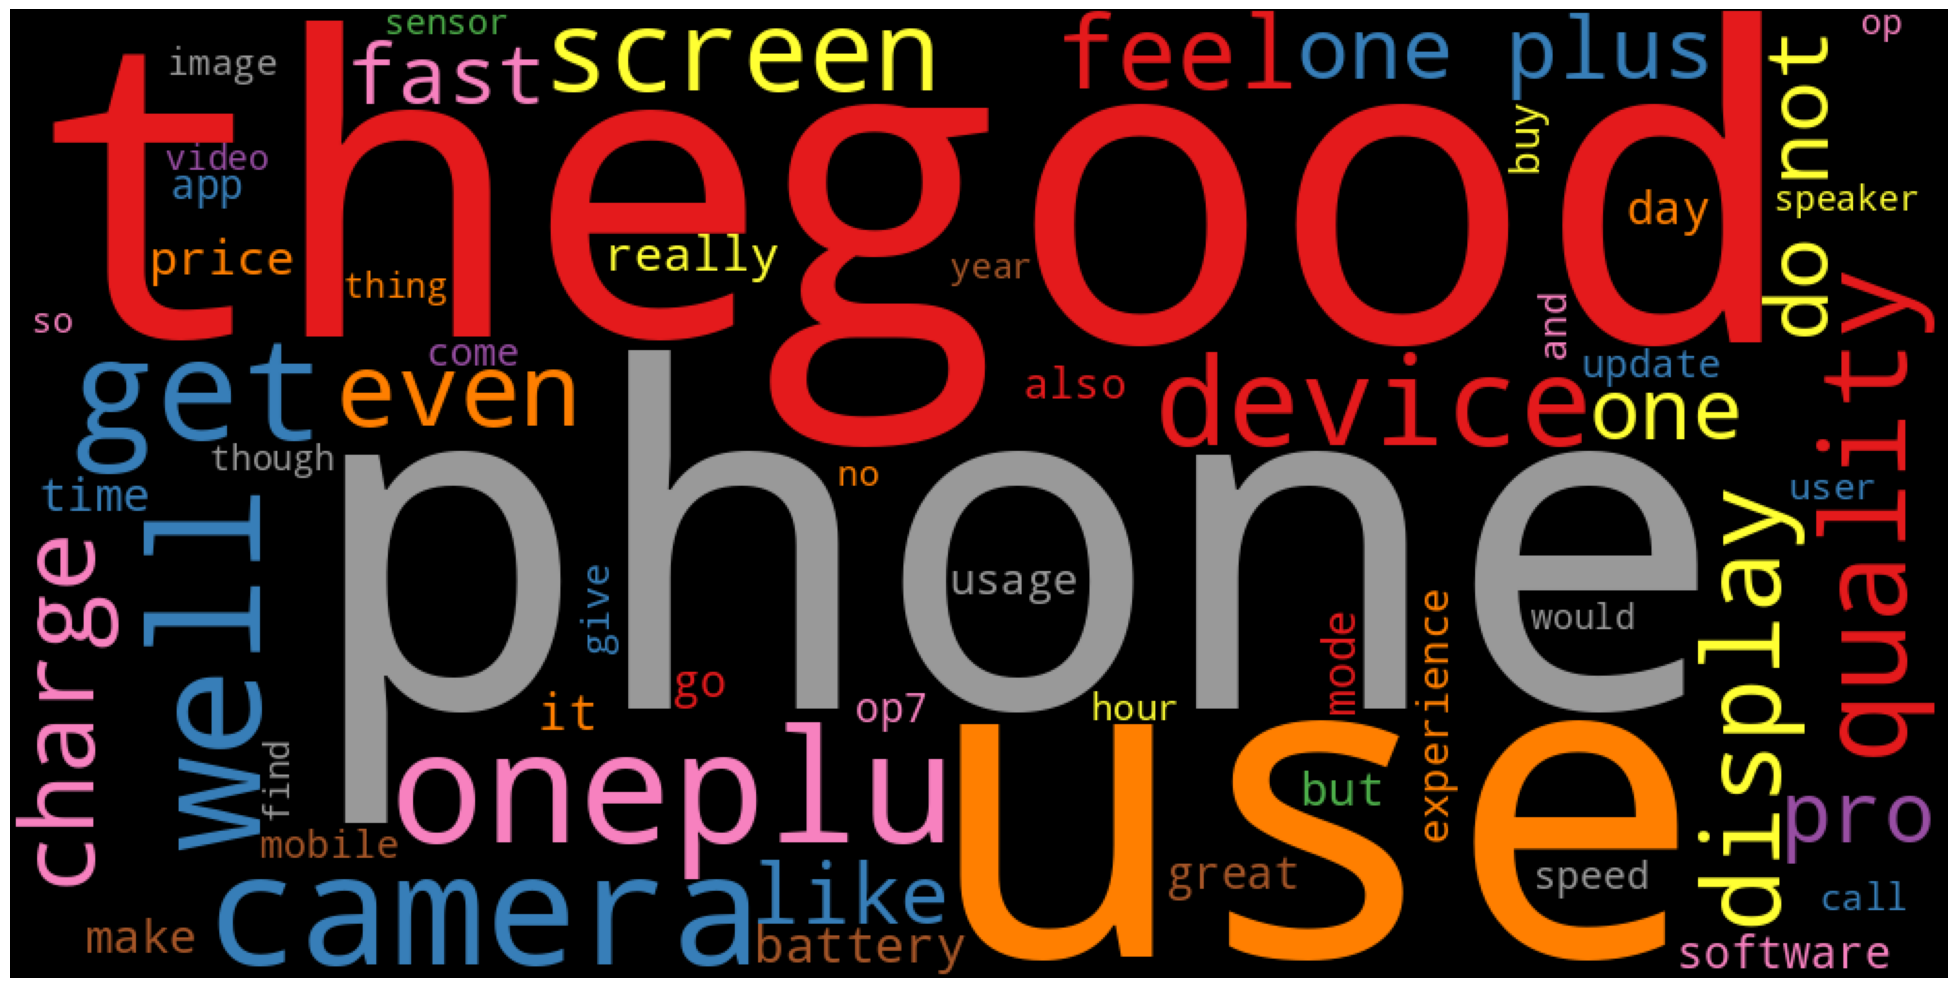

In [52]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(25,15))
  plt.imshow(wordcloud)
  plt.axis("off")

STOPWORDS= set()
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud= WordCloud(width=1000,height=500,background_color='black',max_words=60,colormap="Set1",stopwords=STOPWORDS).generate(clean_review)
plot_cloud(wordcloud)

# **Emotion Minning**

In [53]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(all_reviews))
sentences

['I have been a loyal OP user for many years now.',
 'And i recently upgrade from OnePlus 6 to the 7.',
 'My review is from the perspective of a loyal OP user who is now a bit sceptical about the brand & how long will my loyalties withstand.',
 'Please do not get me wrong - I did give the phone 5 stars & I shall explain why my last statement is contrary to my rating.First up - OP knocked the pricing out of the park with the OP7.',
 'I previously owned a OP6 8/128 gb version & I have been wanting to upgrade to 256gb since I use my phone extensively for taking photos & watching movies on the go.The UFS 3.0 storage helps a lot with that.',
 'More over the 3700mah battery (from 6T) helps power through the day with ease.',
 'Certainly better than the 3300mah on the OP6.Secondly, the speaker quality feels great.',
 'I can finally hear the phone ring in my pocket or in the other room.',
 'Something the 6 struggled with.',
 'The larger earpiece is also great for calls finally.',
 'The rather t

In [54]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I have been a loyal OP user for many years now.
1,And i recently upgrade from OnePlus 6 to the 7.
2,My review is from the perspective of a loyal O...
3,Please do not get me wrong - I did give the ph...
4,I previously owned a OP6 8/128 gb version & I ...
...,...
310,Always use the Bokeh effect in GCam or Stock c...
311,But in moderate lightning conditions use the G...
312,"Also in normal night photography, Nightscape 2..."
313,A few software updates can solve the existing ...


In [55]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [56]:
afinn =pd.read_csv("Afinn.csv",sep=",",encoding='Latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [57]:
affinity_scores= afinn.set_index("word")['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [58]:
nlp= spacy.load("en_core_web_sm")
sentiment_lexicon= affinity_scores

def cal_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence= nlp(text)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [59]:
sent_df['sentiment_value']=sent_df['sentence'].apply(cal_sentiment)
sent_df['sentiment_value']

0      3
1      0
2      4
3     -1
4      3
      ..
310    1
311    2
312    3
313    1
314    0
Name: sentiment_value, Length: 315, dtype: int64

In [60]:
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      11
1      10
2      27
3      40
4      40
       ..
310    35
311    25
312    42
313    17
314    22
Name: word_count, Length: 315, dtype: int64

In [61]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
219,But if your figure is dirty then it will creat...,-10,52
204,I got it for discount 28000₹ but price is drop...,-4,33
86,However nothing too extreme so can be ignored....,-3,54
114,The only limitation is lack of ultrawide or te...,-3,19
59,Warranty not covered due to liquid damage.MODE...,-3,24
...,...,...,...
274,Even beats OP 7Pro on benchmarks and speed due...,11,97
292,♥️21) Slow motion in 1080p at 240fps is availa...,13,53
263,While the asus 6z has good image quality color...,14,63
67,"At this price you can get a bigger battery, hi...",16,90


<ipython-input-62-74c6e9ecc54a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df["sentiment_value"])


<Axes: xlabel='sentiment_value', ylabel='Density'>

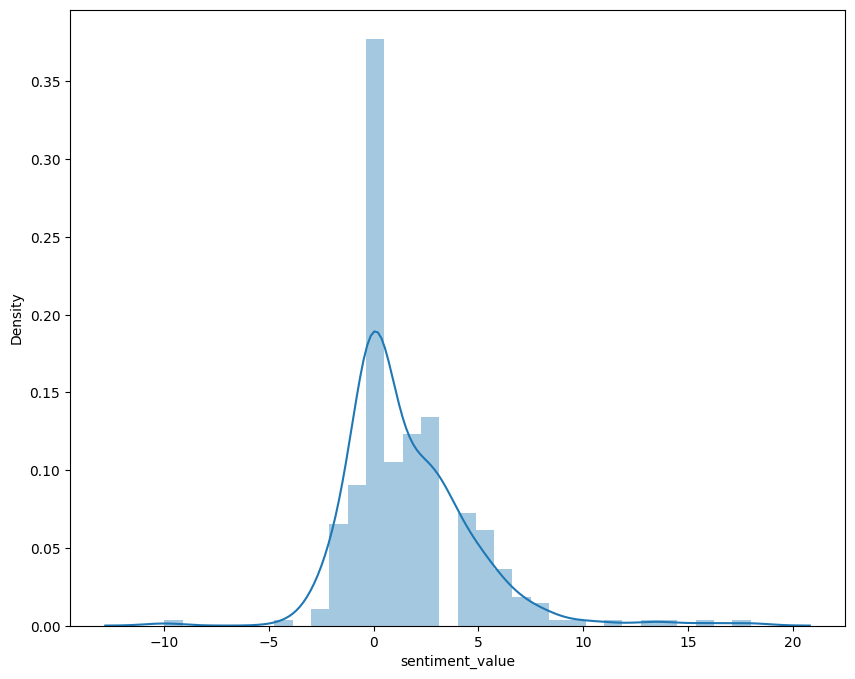

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(sent_df["sentiment_value"])

In [63]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I have been a loyal OP user for many years now.,3,11,0
1,And i recently upgrade from OnePlus 6 to the 7.,0,10,1
2,My review is from the perspective of a loyal O...,4,27,2
3,Please do not get me wrong - I did give the ph...,-1,40,3
4,I previously owned a OP6 8/128 gb version & I ...,3,40,4
...,...,...,...,...
310,Always use the Bokeh effect in GCam or Stock c...,1,35,310
311,But in moderate lightning conditions use the G...,2,25,311
312,"Also in normal night photography, Nightscape 2...",3,42,312
313,A few software updates can solve the existing ...,1,17,313


<Axes: xlabel='index', ylabel='sentiment_value'>

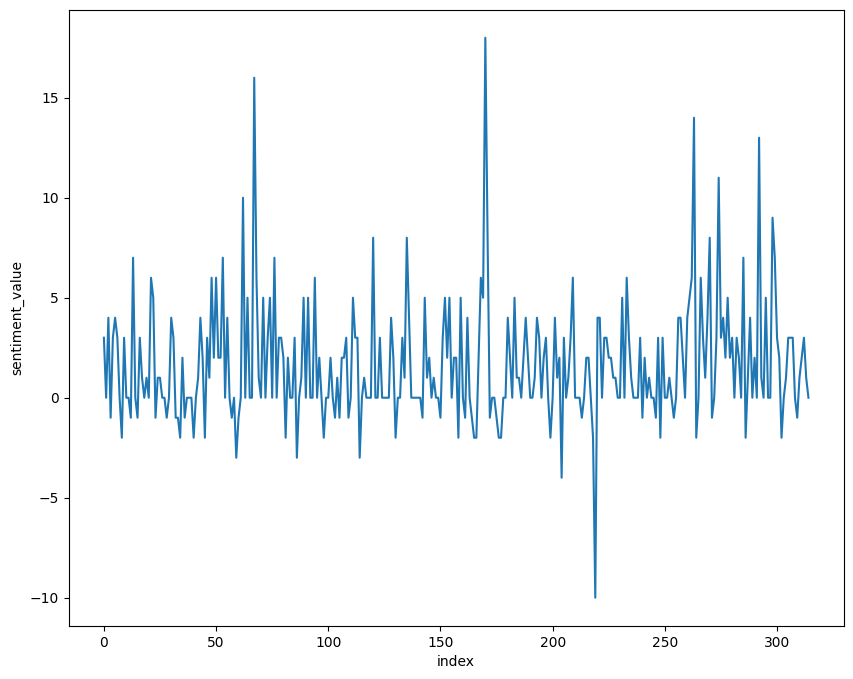

In [64]:
plt.figure(figsize=(10,8))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: xlabel='word_count', ylabel='sentiment_value'>

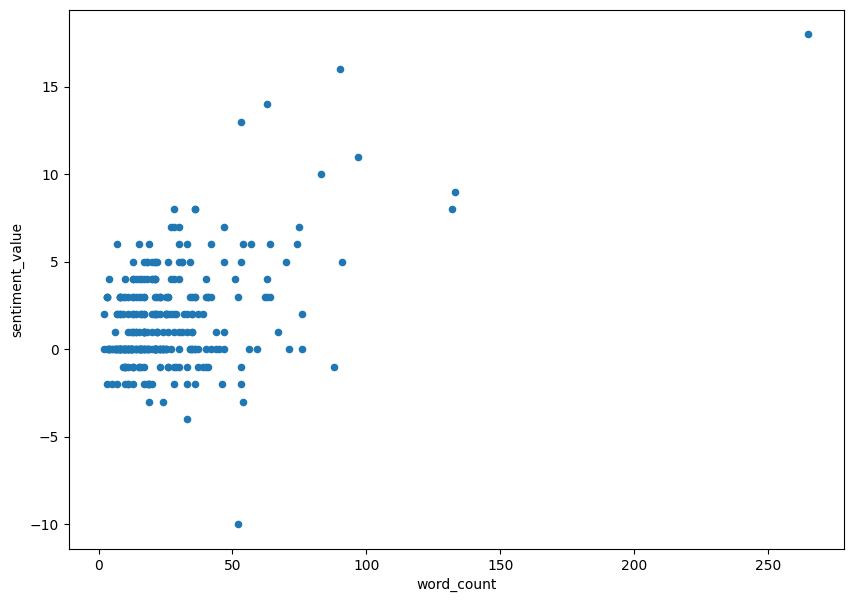

In [65]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(10,7))